In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# CSV 파일 읽기
file_path = 'data_2015.nc4'

dataset = xr.open_dataset(file_path)

"""
# 모든 변수 및 차원 확인
print("Dimensions:")
for dim in dataset.dims:
    print(f'{dim}: {dataset.dims[dim]}')

print("\nCoordinates:")
for coord in dataset.coords:
    print(f'{coord}: {dataset.coords[coord]}')

print("\nVariables:")
for var in dataset.variables:
    print(f'{var}: {dataset.variables[var]}')
"""

print(dataset)

<xarray.Dataset> Size: 2GB
Dimensions:     (time: 1, depth: 40, lat: 3251, lon: 4500)
Coordinates:
  * time        (time) datetime64[ns] 8B 2015-12-31T09:00:00
  * depth       (depth) float64 320B 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
  * lat         (lat) float64 26kB -80.0 -79.96 -79.92 ... 89.92 89.96 90.0
  * lon         (lon) float64 36kB -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
Data variables:
    water_temp  (time, depth, lat, lon) float32 2GB ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:

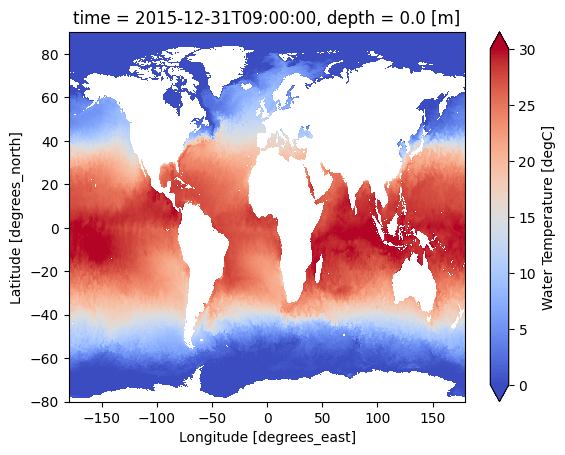

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

file_path = 'data_2015.nc4'

dataset = xr.open_dataset(file_path)

lat_range = slice(-80, 90)  
lon_range = slice(-180, 179.9)

data = dataset['water_temp']

selected_data = data.sel(lat=lat_range, lon=lon_range).isel(time=0, depth=0)
selected_data.plot(cmap='coolwarm', vmax=30, vmin=0)
plt.show()

# for i in range(8):
#     selected_data = data.sel(lat=lat_range, lon=lon_range).isel(time=i, depth=0)
#     selected_data.plot(cmap='coolwarm', vmax=30, vmin=0)
#     plt.show()

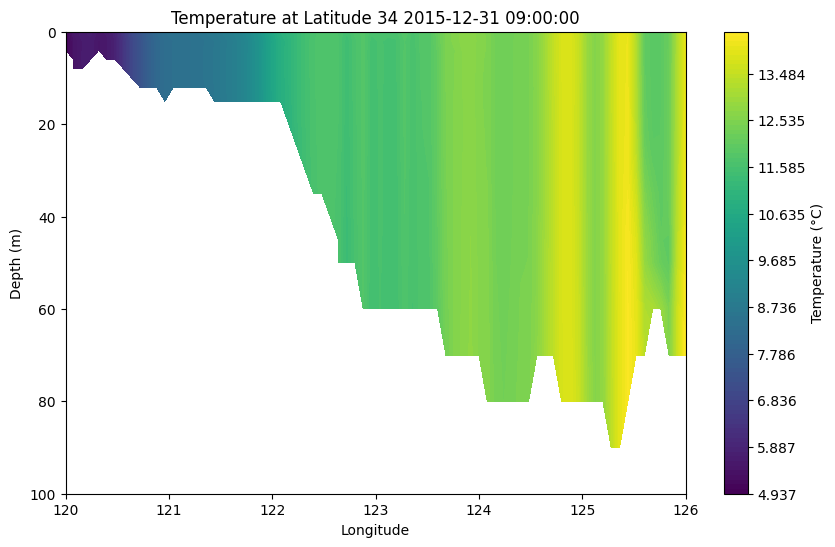

In [4]:
### 위도 고정, 경도&수심 시각화
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data_2015.nc4'
ds = xr.open_dataset(file_path)

# 위도 및 경도 설정
fixed_lat = 34
lon_min = 120
lon_max = 126

time_array = ds['time']
time = time_array.dt.strftime('%Y-%m-%d %H:%M:%S').values.tolist()

# 고정된 위도에 대해 가장 가까운 값을 선택
closest_lat = ds.lat.sel(lat=fixed_lat, method='nearest')

# 경도 범위에서 데이터 선택
data_slice = ds.sel(lat=closest_lat, lon=slice(lon_min, lon_max))

temperature = data_slice['water_temp']  
depth = data_slice['depth'] 

# depth 100m까지
depth_limit = 100
depth_mask = depth <= depth_limit
temperature = temperature.where(depth_mask, drop=True)
depth = depth.where(depth_mask, drop=True)

plt.figure(figsize=(10, 6))
plt.contourf(data_slice['lon'], depth, temperature[0, :, :], 
             levels=np.linspace(temperature.min(), temperature.max(), 100), cmap='viridis')
plt.colorbar(label='Temperature (°C)')
plt.title(f'Temperature at Latitude {fixed_lat} {time[0]}')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.ylim(depth.max(), depth.min())  
plt.show()  


# for i in range(temperature.shape[0]): 
#     plt.figure(figsize=(10, 6))
#     plt.contourf(data_slice['lon'], depth, temperature[i, :, :], 
#                  levels=np.linspace(temperature.min(), temperature.max(), 100), cmap='viridis')
#     plt.colorbar(label='Temperature (°C)')
#     plt.title(f'Temperature at Latitude {fixed_lat} {time[i]}')
#     plt.xlabel('Longitude')
#     plt.ylabel('Depth (m)')
#     plt.ylim(depth.max(), depth.min())  
#     plt.show()  
